# AVATAR: Adversarial Autoencoders with Autoregressive Refinement for Time Series Generation

## Necessary packages

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import logging
tf.get_logger().setLevel(logging.ERROR)

# 1. AVATAR model
from avatar import avatar
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
import numpy as np
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

## Data Loading

Load original dataset and preprocess the loaded data.

In [2]:
original_data = []
generated_data = []

In [3]:
## Data loading
data_name = 'stock'
seq_len = 24

if data_name in ['energy','stock']:
  original_data.append(real_data_loading(data_name, seq_len))

    
print(data_name + ' dataset is ready.')

stock dataset is ready.


In [4]:
## Data loading
data_name = 'sine'
seq_len = 24

if data_name in ['sine']:
  # Set number of samples and its dimensions
  no, dim = 10000, 4
  original_data.append(sine_data_generation(no, seq_len, dim))
    
print(data_name + ' dataset is ready.')

sine dataset is ready.


In [5]:
## Data loading
data_name = 'energy'
seq_len = 24

if data_name in ['energy','stock']:
  original_data.append(real_data_loading(data_name, seq_len))
   
print(data_name + ' dataset is ready.')

energy dataset is ready.


## Set network parameters

AVATAR network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: enter 'same' or the number of hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [7]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 'same'
parameters['num_layer'] = 4
parameters['iterations'] = 8000
parameters['batch_size'] = 128

## Run synthetic time-series data generation

AVATAR uses the original data and network parameters to return the generated synthetic data.

In [8]:
# Run AVATAR
generated_data.append(avatar(original_data[0], parameters, 'same'))
print('Finished Synthetic Data Generation')

Start Embedding Network Training
step: 0/8000, e_loss: 0.3402
step: 1000/8000, e_loss: 0.0501
step: 2000/8000, e_loss: 0.0444
step: 3000/8000, e_loss: 0.0349
step: 4000/8000, e_loss: 0.0291
step: 5000/8000, e_loss: 0.0264
step: 6000/8000, e_loss: 0.0265
step: 7000/8000, e_loss: 0.0261
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/8000, s_loss: 0.4761
step: 1000/8000, s_loss: 0.0215
step: 2000/8000, s_loss: 0.0182
step: 3000/8000, s_loss: 0.0088
step: 4000/8000, s_loss: 0.0072
step: 5000/8000, s_loss: 0.0063
step: 6000/8000, s_loss: 0.01
step: 7000/8000, s_loss: 0.0049
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/8000, D_loss: 1.4179, R_loss_: 0.1741, Ad_loss_: 0.7735, S_loss_: 0.0094, Distribution_loss: 0.2785
step: 1000/8000, D_loss: 1.3675, R_loss_: 0.0055, Ad_loss_: 0.7133, S_loss_: 0.0208, Distribution_loss: 0.1194
step: 2000/8000, D_loss: 1.3853, R_loss_: 0.0053, Ad_loss_: 0.7011, S_loss_: 0.013, Distribution_loss: 0.0

In [9]:
# Run AVATAR
generated_data.append(avatar(original_data[1], parameters, 'same'))
print('Finished Synthetic Data Generation')

Start Embedding Network Training
step: 0/8000, e_loss: 0.3301
step: 1000/8000, e_loss: 0.1495
step: 2000/8000, e_loss: 0.1354
step: 3000/8000, e_loss: 0.083
step: 4000/8000, e_loss: 0.0807
step: 5000/8000, e_loss: 0.0623
step: 6000/8000, e_loss: 0.0662
step: 7000/8000, e_loss: 0.0627
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/8000, s_loss: 0.4605
step: 1000/8000, s_loss: 0.0373
step: 2000/8000, s_loss: 0.0177
step: 3000/8000, s_loss: 0.012
step: 4000/8000, s_loss: 0.0087
step: 5000/8000, s_loss: 0.0071
step: 6000/8000, s_loss: 0.0052
step: 7000/8000, s_loss: 0.004
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/8000, D_loss: 1.3729, R_loss_: 0.3227, Ad_loss_: 0.7789, S_loss_: 0.0088, Distribution_loss: 0.3365
step: 1000/8000, D_loss: 1.3392, R_loss_: 0.0924, Ad_loss_: 0.8103, S_loss_: 0.0499, Distribution_loss: 0.2113
step: 2000/8000, D_loss: 1.4075, R_loss_: 0.0823, Ad_loss_: 0.667, S_loss_: 0.041, Distribution_loss: 0.132

In [7]:
# Run AVATAR
generated_data.append(avatar(original_data[2], parameters, 'same'))
print('Finished Synthetic Data Generation')

Start Embedding Network Training
step: 0/8000, e_loss: 0.4107
step: 1000/8000, e_loss: 0.1549
step: 2000/8000, e_loss: 0.1148
step: 3000/8000, e_loss: 0.1006
step: 4000/8000, e_loss: 0.0964
step: 5000/8000, e_loss: 0.0985
step: 6000/8000, e_loss: 0.0972
step: 7000/8000, e_loss: 0.0935
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/8000, s_loss: 0.4996
step: 1000/8000, s_loss: 0.025
step: 2000/8000, s_loss: 0.0058
step: 3000/8000, s_loss: 0.0022
step: 4000/8000, s_loss: 0.001
step: 5000/8000, s_loss: 0.0004
step: 6000/8000, s_loss: 1e-04
step: 7000/8000, s_loss: 1e-04
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/8000, D_loss: 1.3863, R_loss_: 0.2591, Ad_loss_: 0.6927, S_loss_: 0.0049, Distribution_loss: 0.3693
step: 1000/8000, D_loss: 0.5789, R_loss_: 0.0623, Ad_loss_: 1.742, S_loss_: 0.0803, Distribution_loss: 0.133
step: 2000/8000, D_loss: 0.7787, R_loss_: 0.0424, Ad_loss_: 1.7107, S_loss_: 0.0811, Distribution_loss: 0.4827

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

### Stocks

In [22]:
metric_iteration = 10

discriminative_score = list()
for _ in range(metric_iteration):
    temp_disc = discriminative_score_metrics(original_data[0], generated_data[0])
    discriminative_score.append(temp_disc)

# Convert the list to a numpy array for easier manipulation
discriminative_score = np.array(discriminative_score)

# Calculate the first (Q1) and third (Q3) quartiles
Q1 = np.percentile(discriminative_score, 25)
Q3 = np.percentile(discriminative_score, 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Filter out values greater than the upper bound (only removing high outliers)
filtered_scores = discriminative_score[discriminative_score <= upper_bound]

# Calculate the mean and std of the filtered scores
print('Discriminative score Mean: ' + str(np.round(np.mean(filtered_scores), 4)))
print(f'Discriminative Score Std: {np.round(np.std(filtered_scores), 4)}')

Discriminative score Mean: 0.1296
Discriminative Score Std: 0.0047


### Sines

In [12]:
metric_iteration = 10

discriminative_score = list()
for _ in range(metric_iteration):
    temp_disc = discriminative_score_metrics(original_data[1], generated_data[1])
    discriminative_score.append(temp_disc)

# Convert the list to a numpy array for easier manipulation
discriminative_score = np.array(discriminative_score)

# Calculate the first (Q1) and third (Q3) quartiles
Q1 = np.percentile(discriminative_score, 25)
Q3 = np.percentile(discriminative_score, 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Filter out values greater than the upper bound (only removing high outliers)
filtered_scores = discriminative_score[discriminative_score <= upper_bound]

# Calculate the mean and std of the filtered scores
print('Discriminative score Mean: ' + str(np.round(np.mean(filtered_scores), 4)))
print(f'Discriminative Score Std: {np.round(np.std(filtered_scores), 4)}')

Discriminative score Mean: 0.064
Discriminative Score Std: 0.0336


### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

### Stocks

In [13]:
metric_iteration = 10

predictive_score = list()
for tt in range(metric_iteration):
    temp_pred = predictive_score_metrics(original_data[0], generated_data[0])
    predictive_score.append(temp_pred)

# Convert the list to a numpy array for easier manipulation
predictive_score = np.array(predictive_score)

# Calculate the first (Q1) and third (Q3) quartiles
Q1 = np.percentile(predictive_score, 25)
Q3 = np.percentile(predictive_score, 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Filter out values greater than the upper bound (only removing high outliers)
filtered_pred_scores = predictive_score[predictive_score <= upper_bound]

# Calculate and print the mean and std of the filtered scores
print('Predictive score Mean: ' + str(np.round(np.mean(filtered_pred_scores), 4)))
print(f'Predictive Score Std: {np.round(np.std(filtered_pred_scores), 4)}')

Predictive score Mean: 0.0428
Predictive Score Std: 0.0003


### Sines

In [14]:
metric_iteration = 10

predictive_score = list()
for tt in range(metric_iteration):
    temp_pred = predictive_score_metrics(original_data[1], generated_data[1])
    predictive_score.append(temp_pred)

# Convert the list to a numpy array for easier manipulation
predictive_score = np.array(predictive_score)

# Calculate the first (Q1) and third (Q3) quartiles
Q1 = np.percentile(predictive_score, 25)
Q3 = np.percentile(predictive_score, 75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Filter out values greater than the upper bound (only removing high outliers)
filtered_pred_scores = predictive_score[predictive_score <= upper_bound]

# Calculate and print the mean and std of the filtered scores
print('Predictive score Mean: ' + str(np.round(np.mean(filtered_pred_scores), 4)))
print(f'Predictive Score Std: {np.round(np.std(filtered_pred_scores), 4)}')

Predictive score Mean: 0.095
Predictive Score Std: 0.0002


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

### Stocks

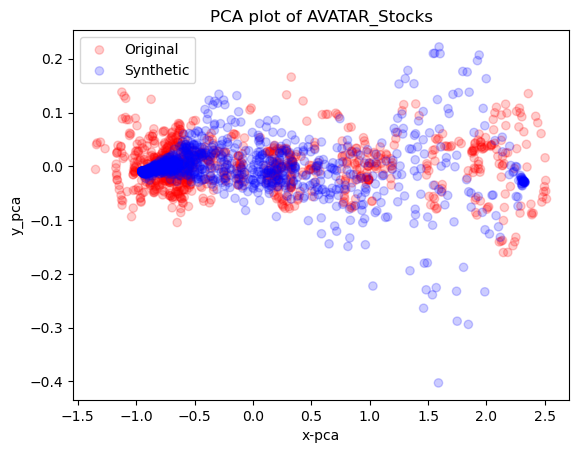

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.020792
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.068420
[t-SNE] KL divergence after 300 iterations: 0.912956


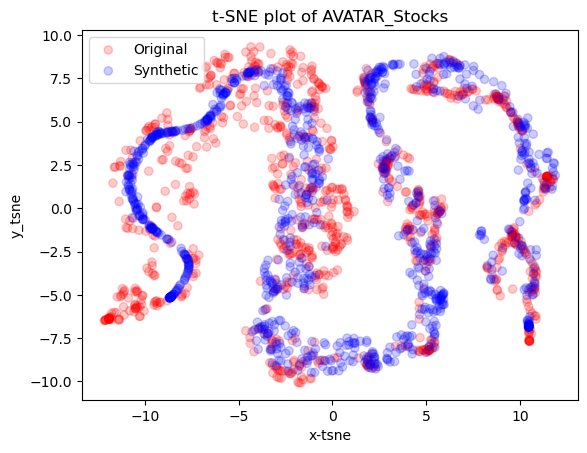

In [15]:
visualization(original_data[0], generated_data[0], 'pca', "AVATAR_Stocks")
visualization(original_data[0], generated_data[0], 'tsne', "AVATAR_Stocks")

### Sines

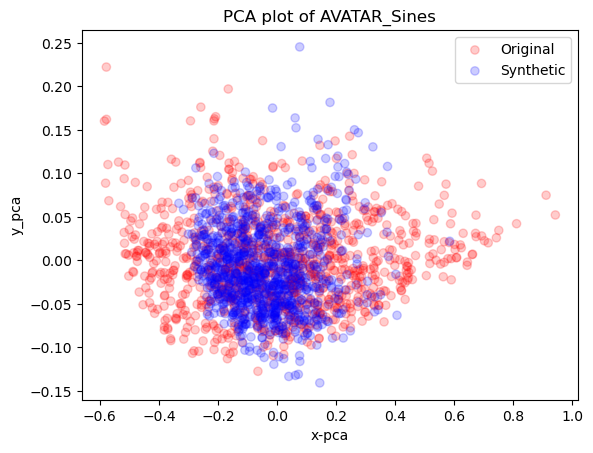

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.026276
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.939060
[t-SNE] KL divergence after 300 iterations: 1.334118


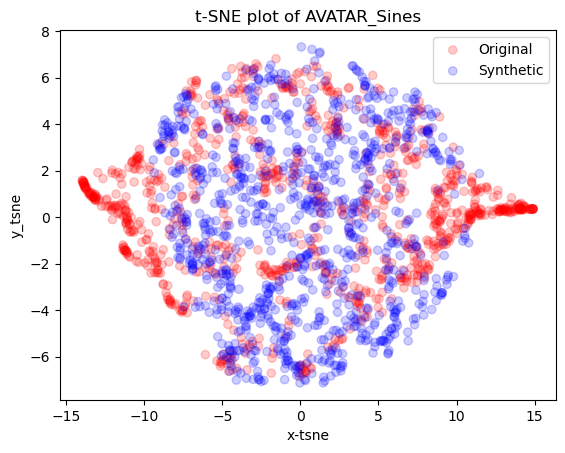

In [17]:
visualization(original_data[1], generated_data[1], 'pca', "AVATAR_Sines")
visualization(original_data[1], generated_data[1], 'tsne', "AVATAR_Sines")

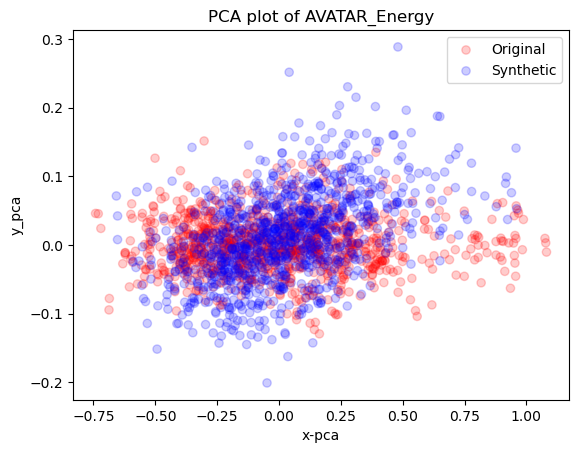

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.044512
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.393696
[t-SNE] KL divergence after 300 iterations: 1.633994


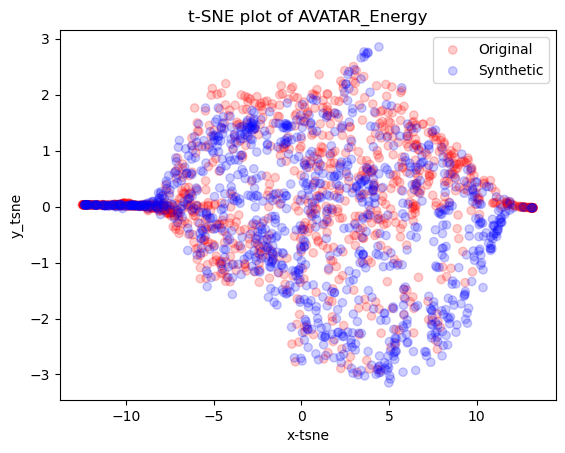

In [11]:
visualization(original_data[2], generated_data[2], 'pca', "AVATAR_Energy")
visualization(original_data[2], generated_data[2], 'tsne', "AVATAR_Energy")